# Small World

$k$-ring network: nodes arranged around a circle, with each node connected to the nearest k/2 nodes on
each side. The following example creates and visualizes a four-ring using the
`watts_strogatz_graph()`.

1. What networks can be generated using the function `watts_strogatz_graph()`?
2. What networks can be generated using the function `newman_watts_strogatz_graph()`?

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

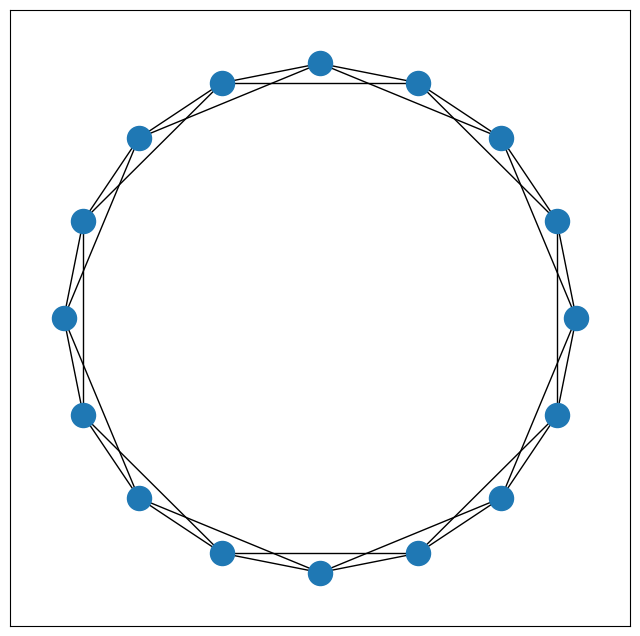

In [5]:
G_small_ring = nx.watts_strogatz_graph(16, 4, 0)
pos = nx.circular_layout(G_small_ring)
plt.figure(figsize=(8,8))
nx.draw_networkx(G_small_ring, pos=pos, with_labels=False)

Compute the mean shortest path length and the network clustering coefficient in `G_small_ring` and in a 4000-node 10-ring.

In [6]:
# G_small_ring

mean_spl = nx.average_shortest_path_length(G_small_ring)
clustering = nx.average_clustering(G_small_ring)

print(f"Mean shortest path length: {mean_spl}")
print(f"Network clustering coefficient: {clustering}")

Mean shortest path length: 2.4
Network clustering coefficient: 0.5


In [8]:
# a 4000-node 10-ring 

G_big_ring = nx.watts_strogatz_graph(4000, 10, 0)
mean_spl = nx.average_shortest_path_length(G_big_ring)
clustering = nx.average_clustering(G_big_ring)

print(f"Mean shortest path length: {mean_spl}")
print(f"Network clustering coefficient: {clustering}")

Mean shortest path length: 200.45011252813202
Network clustering coefficient: 0.6666666666666546


What is the small world hypothesis? Is $k$-ring a good model for 'small world' network?

## A Real Social Network
Let's see how the preceding results compare to a real social network (McAuley & Leskovec,
2012) J. McAuley and J. Leskovec. Learning to Discover Social Circles in Ego Networks. NIPS, 2012.
http://snap.stanford.edu/data/ego-Facebook.html
. The following code loads the network and calculates the mean shortest path and
mean clustering.

In [10]:
# Load data file into network
G_social = nx.read_edgelist('data/facebook_combined.txt')

Compute the mean shortest path length and mean clustering in the Facebook network.

In [11]:
mean_spl = nx.average_shortest_path_length(G_social)
clustering = nx.average_clustering(G_social)

print(f"Mean shortest path length: {mean_spl}")
print(f"Network clustering coefficient: {clustering}")

Mean shortest path length: 3.6925068496963913
Network clustering coefficient: 0.6055467186200876


## A Random Network

Do the same with a random network.

Mean shortest path length: 1.975
Network clustering coefficient: 0.22023809523809526


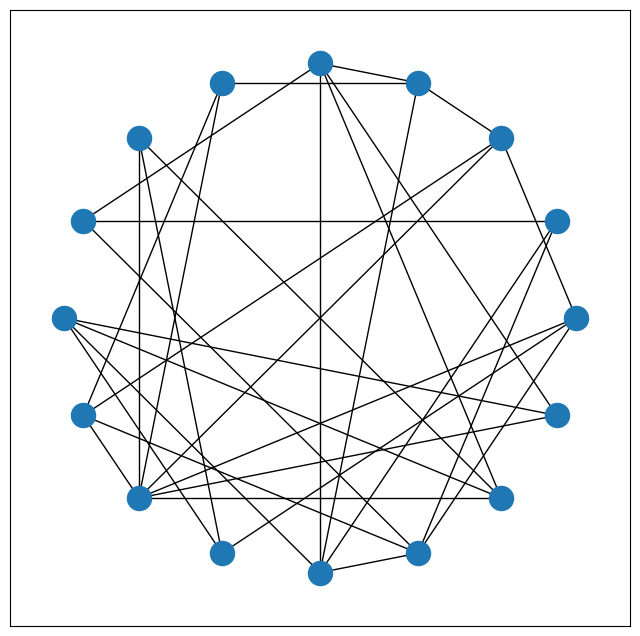

In [12]:
G_small_random = nx.watts_strogatz_graph(16, 4, 1)
pos = nx.circular_layout(G_small_random)
plt.figure(figsize=(8,8))
nx.draw_networkx(G_small_random, pos=pos, with_labels=False)

mean_spl = nx.average_shortest_path_length(G_small_random)
clustering = nx.average_clustering(G_small_random)

print(f"Mean shortest path length: {mean_spl}")
print(f"Network clustering coefficient: {clustering}")

## Watts-Strogatz Networks

In 1998, Duncan Watts and Steven Strogatz found a way to model networks with both high
clustering and short path lengths. It begins with a ring network and then rewires some of
the edges. In fact, this is exactly what the watts_strogatz_graph() function we've been
using does, and the third parameter specifies the fraction of edges to rewire. The following
code calculates the average shortest path and average clustering for a range of rewiring
probabilities:

In [13]:
path = []
clustering = []
# Try a range of rewiring probabilities
p = [10**(x) for x in range(-6, 1)]
for p_i in p:
    path_i = []
    clustering_i =[]
    # Create 10 models for each probability
    for n in range(10):
        G = nx.watts_strogatz_graph(1000, 10, p_i)
        path_i.append(nx.average_shortest_path_length(G))
        clustering_i.append(nx.average_clustering(G))
    # Average the properties for each p_i
    path.append(sum(path_i) / len(path_i))
    clustering.append(sum(clustering_i) / len(clustering_i))

Let us visualize how these values change as the rewiring probability ranges from 0 to 1.

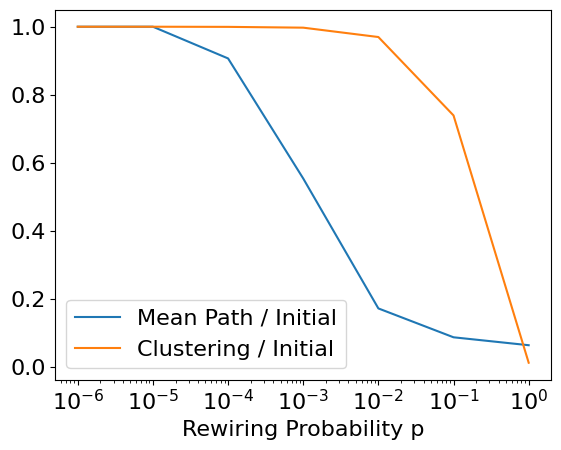

In [14]:
# Plot the results
fig, ax = plt.subplots()
for spine in ax.spines.values():
    spine.set_visible(True)
plt.semilogx(p, [x / path[0] for x in path], label='Mean Path / Initial')
plt.semilogx(p, [x / clustering[0] for x in clustering], label='Clustering / Initial')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('Rewiring Probability p', fontsize=16)
plt.legend(fontsize=16)

# Contagion – How Things Spread

## Simple Contagion
A simple contagion is a social process in which each individual becomes infected after a
single exposure. Simple contagions are good models for highly contagious diseases, or the
spread of uncontroversial information.

In [15]:
def propagate_simple(G):
    # Find all nodes that have value True in their property infected
    # set inbfected to True in all their neighbours that are still
    # not infected
    toInfect = []
    for node in G.nodes:
        if G.nodes[node]['infected']: pass
        neigh = G.neighbors(node)
        for n in neigh:
            if G.nodes[n]['infected'] == True:
                toInfect.append(node)
    for n in toInfect:
        G.nodes[n]['infected'] = True
        


In [16]:
G_small_ring = nx.watts_strogatz_graph(16, 4, 0)
pos = nx.circular_layout(G_small_ring)

nx.set_node_attributes(
    G_small_ring,
    dict((i, False) for i in range(16)),
    'infected')
for i in range(2):
    G_small_ring.nodes[i]['infected'] = True

Perform two steps of spreading on a `G_small_ring` and mark the infected and noninfected nodes with a different color. E.g.

![Contagion spread](Contagion.png)

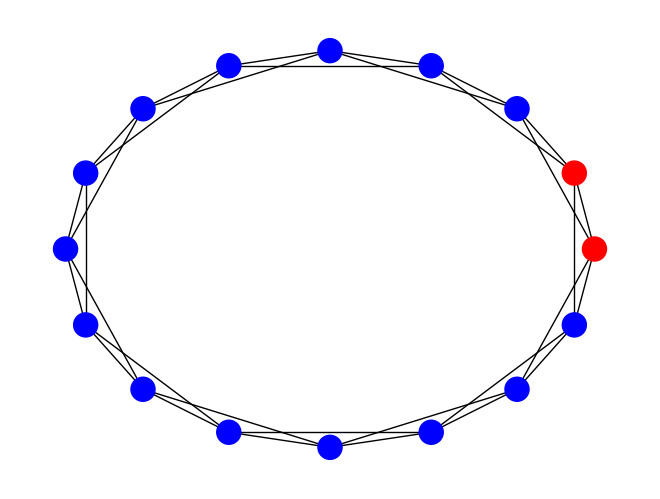

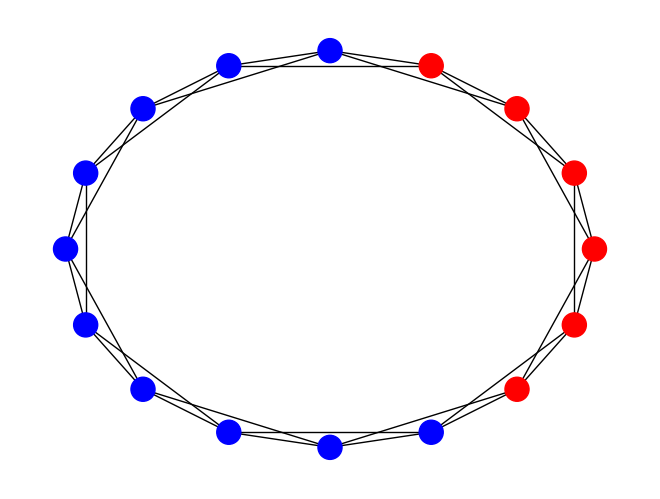

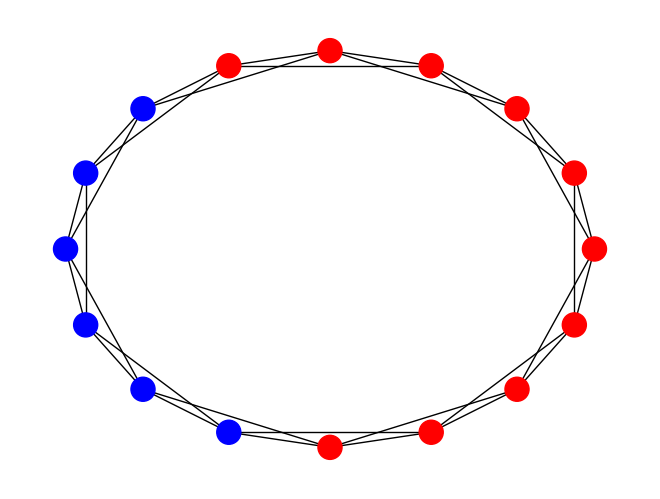

In [17]:
def color_graph(graph):
    # plot network nettwork
    colors = ['red' if i else 'blue' for i in nx.get_node_attributes(graph, 'infected').values()]
    plt.figure()
    nx.draw(graph, node_color = colors, pos=pos)

color_graph(G_small_ring)
propagate_simple(G_small_ring)
color_graph(G_small_ring)
propagate_simple(G_small_ring)
color_graph(G_small_ring)

Do the same with the network `G_small_random`.

In [18]:
G_small_random = nx.watts_strogatz_graph(16, 4, 1)
pos = nx.circular_layout(G_small_random)
nx.set_node_attributes(
    G_small_random,
    dict((i, False) for i in range(16)),
    'infected')

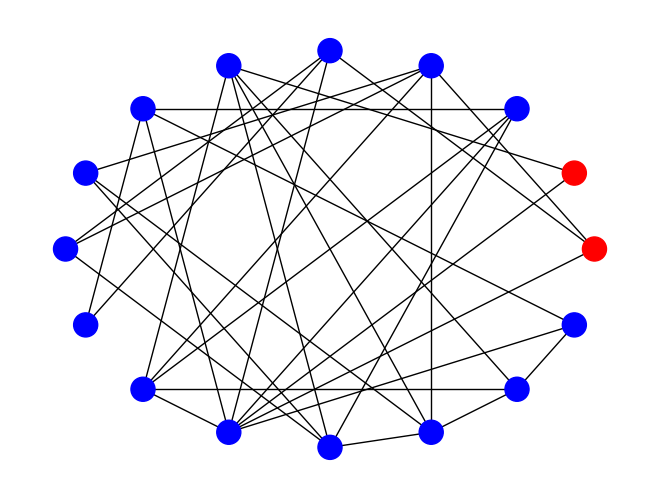

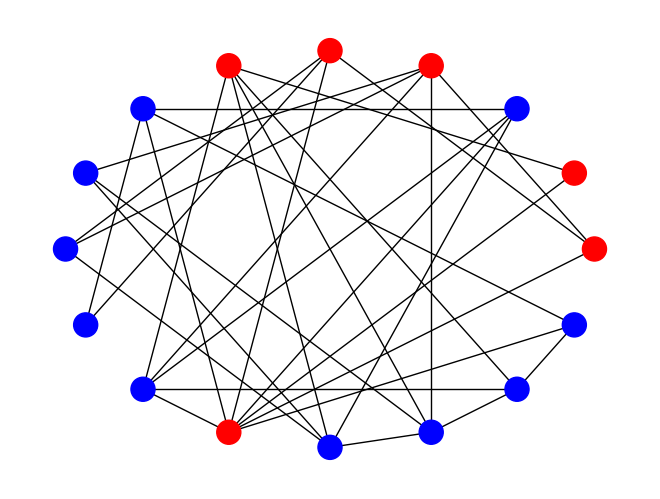

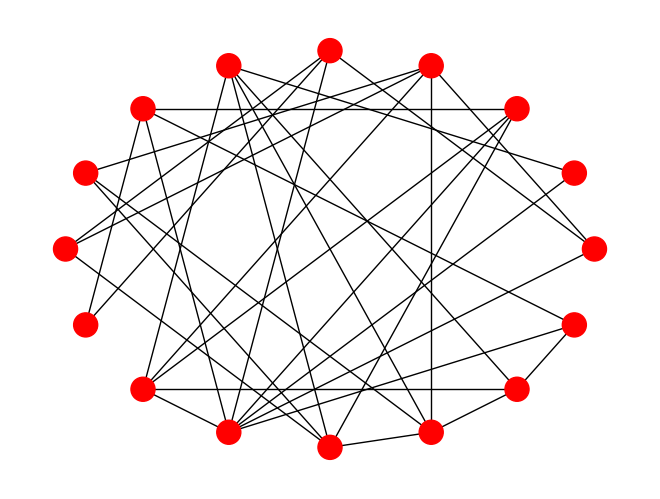

In [19]:
for i in range(2):
    G_small_random.nodes[i]['infected'] = True
    
for i in range(2):
    color_graph(G_small_random)
    propagate_simple(G_small_random)
    
color_graph(G_small_random)


In [20]:
def propagate_coloring(G, init_infected=2, steps=2):
    for i in range(init_infected):
        G.nodes[i]['infected'] = True
    
    for i in range(steps):
        color_graph(G)
        propagate_simple(G)

    color_graph(G)

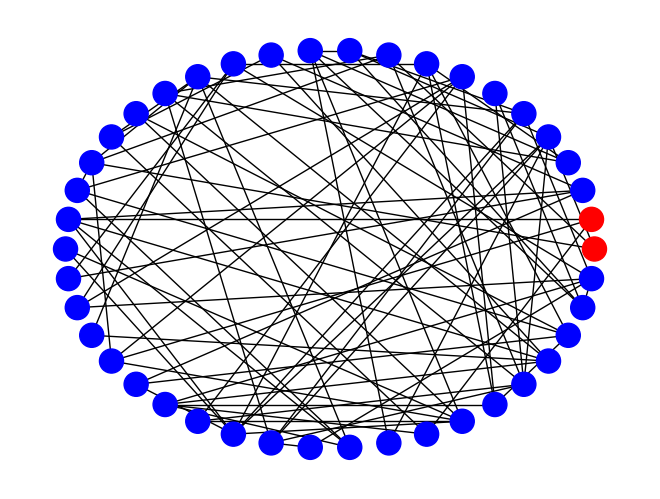

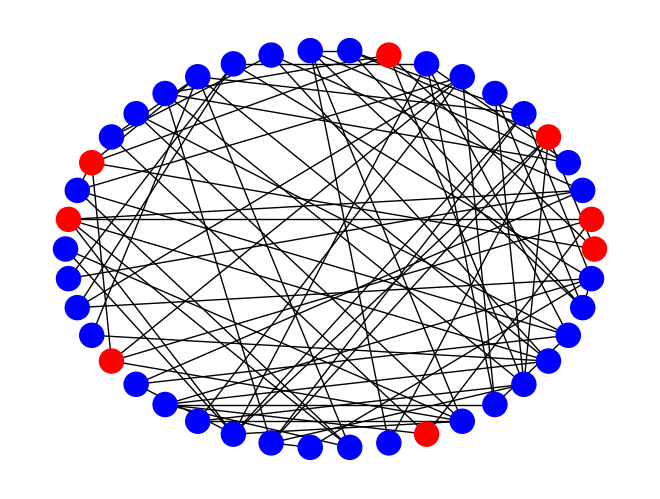

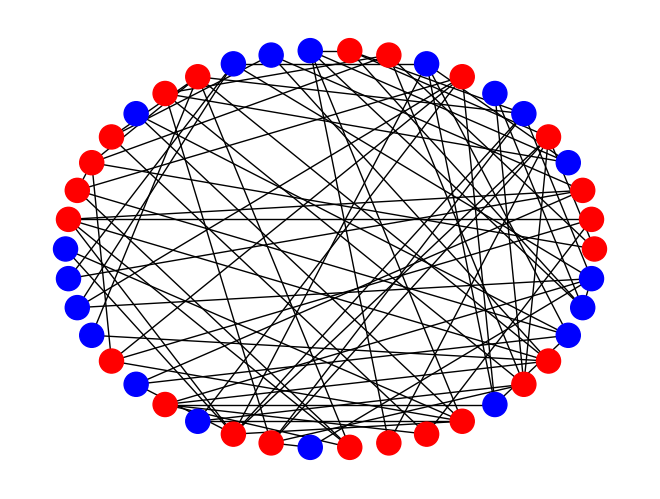

In [21]:
G_small_random_2 = nx.watts_strogatz_graph(42, 4, 2)
pos = nx.circular_layout(G_small_random_2)
nx.set_node_attributes(
    G_small_random_2,
    dict((i, False) for i in range(42)),
    'infected')
propagate_coloring(G_small_random_2)

# Complex Contagion
Not all contagions are spread after a single exposure. Less contagious diseases might need
multiple exposures to infect an individual. Similarly, controversial ideas or behaviors, for
example, joining a social movement or adopting a new technology, might require an
individual to get recommendations from multiple friends. Such contagions
are called complex contagions (Centola & Macy, 2007). The following code simulates a
complex contagion by only infecting a node if it has two or more infected neighbors.

In [22]:
def propagate_complex(G):
    # Find all nodes that have value False in their property infected,
    # set infected to True in nodes that have at least two neighbours 
    # that are infected
    not_infected = []
    for node in G.nodes:
        if G.nodes[node]['infected'] == False:
            not_infected.append(node)
    for node in not_infected:
        neigh = G.neighbors(node)
        count = 0
        for n in neigh:
            if G.nodes[n]['infected'] == True:
                count += 1
        if count >= 2:
            G.nodes[node]['infected'] = True


Below is a possible illustration of spreading with `propagate_simple`

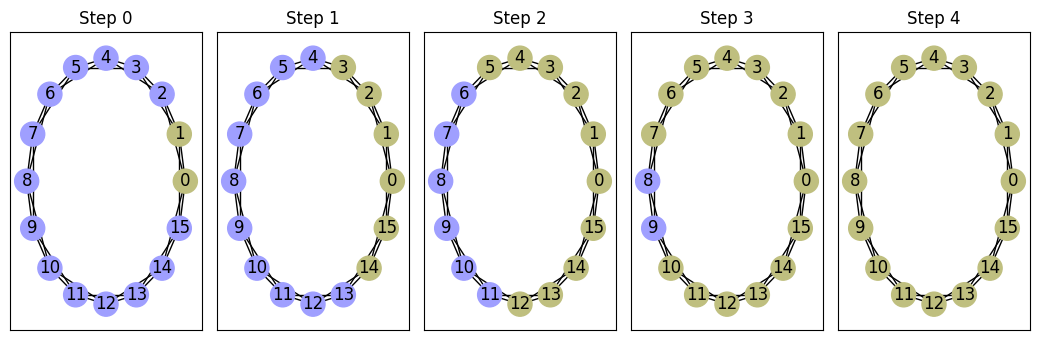

In [23]:
G_small_ring = nx.watts_strogatz_graph(16, 5, 0)
pos = nx.circular_layout(G_small_ring)

nx.set_node_attributes(
    G_small_ring,
    dict((i, False) for i in range(16)),
    'infected')
for i in range(2):
    G_small_ring.nodes[i]['infected'] = True


plt.figure(figsize=(10.5, 3.5))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    node_color = ['#bfbf7f' if G_small_ring.nodes[v]['infected'] else '#9f9fff' 
                  for v in G_small_ring.nodes]
    nx.draw_networkx(
        G_small_ring,
        pos=nx.circular_layout(G_small_ring),
        node_color=node_color)
    propagate_simple(G_small_ring)
    plt.title("Step {}".format(i))
plt.tight_layout()

Simulate spreading of the contagion using `propagate_complex`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96951912-af33-4716-93cf-0ecb946eb990' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>